# Q5: Predicting Shooting Percentages (FG%, 3P%, FT%)

This notebook evaluates which factors best predict a player’s shooting efficiency across the season.

We model:

- Field goal percentage (FG%)
- Three-point percentage (3P%)
- Free throw percentage (FT%)

Import data, then keep only the columns that we need, including FG%, 3P%, FT%, TRB, AST, TOV, and MP. 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data/player_game_stats_clean.csv")

cols = ["FG%", "3P%", "FT%", "TRB", "AST", "TOV", "MP"]
df_q5 = df[cols].dropna()
df_q5.head()

,FG%,3P%,FT%,TRB,AST,TOV,MP
0,0.778,0.727,0.500,4,10,1,30.30
1,0.478,0.333,0.867,16,4,1,37.58
2,0.615,0.600,1.000,3,4,0,26.63
3,0.778,0.667,0.000,4,4,0,30.52
4,0.800,0.800,0.667,0,2,1,25.85


Build a correlation matrix that answers the question: "what factors are the most associated with shooting percentage?"

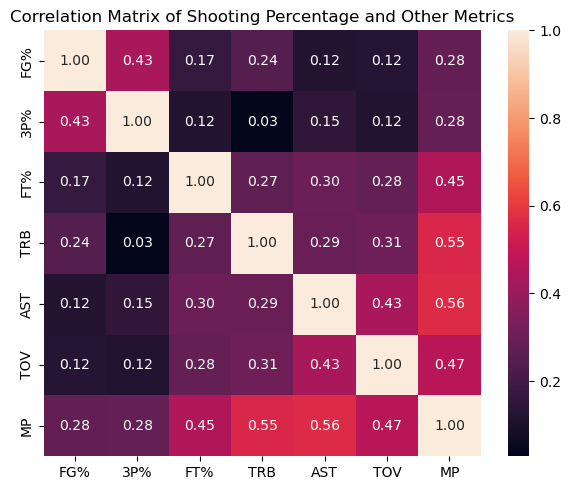

In [9]:
corr = df_q5.corr()
corr[["FG%", "3P%", "FT%"]]

plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title("Correlation Matrix of Shooting Percentage and Other Metrics")
plt.tight_layout()
plt.show()

Now I build a multiple linear regression using OLS (I learned this from DATA 100 last semester). This tells me which variables are most statistically significant, alongside the relative importance of each metric.

In [13]:
import statsmodels.api as sm

X = df_q5[["TRB", "AST", "TOV", "MP"]]
X = sm.add_constant(X)

y_fg = df_q5["FG%"]

model_fg = sm.OLS(y_fg, X).fit()
model_fg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    FG%   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     409.5
Date:                Thu, 18 Dec 2025   Prob (F-statistic):               0.00
Time:                        06:06:54   Log-Likelihood:                -80.334
No. Observations:               16512   AIC:                             170.7
Df Residuals:                   16507   BIC:                             209.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2781      0.004     63.808      0.000       0.270       0.287
TRB            0.0095      0.001     14.522      0.000       0.008       0.011
AST           -0.0044      0.001     -4.921      0.000      -0.006      -0.003
TOV           -0.0010      0.002     -0.638      0.524      -0.004       0.002
MP             0.0055      0.000     21.991      0.000       0.005       0.006
==============================================================================
Omnibus:                     1160.309   Durbin-Watson:                   1.525
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1439.784
Skew:                           0.672   Prob(JB):                         0.00
Kurtosis:                       3.534   Cond. No.                         58.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now I do a simple linear regression for 3P% and FT% and call the .summary() to get an overview of the important metrics.

In [16]:
# 3P%
y_3p = df_q5["3P%"]

model_3p = sm.OLS(y_3p, X).fit()
model_3p.summary()

# FT%
y_ft = df_q5["FT%"]

model_ft = sm.OLS(y_ft, X).fit()
model_ft.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    FT%   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     1085.
Date:                Thu, 18 Dec 2025   Prob (F-statistic):               0.00
Time:                        06:07:52   Log-Likelihood:                -7786.9
No. Observations:               16512   AIC:                         1.558e+04
Df Residuals:                   16507   BIC:                         1.562e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0242      0.007      3.475      0.001       0.011       0.038
TRB            0.0039      0.001      3.733      0.000       0.002       0.006
AST            0.0079      0.001      5.488      0.000       0.005       0.011
TOV            0.0243      0.002      9.844      0.000       0.019       0.029
MP             0.0146      0.000     36.814      0.000       0.014       0.015
==============================================================================
Omnibus:                     2711.832   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              763.923
Skew:                           0.254   Prob(JB):                    1.31e-166
Kurtosis:                       2.077   Cond. No.                         58.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Lastly, I create scatterplots that support the regression models.

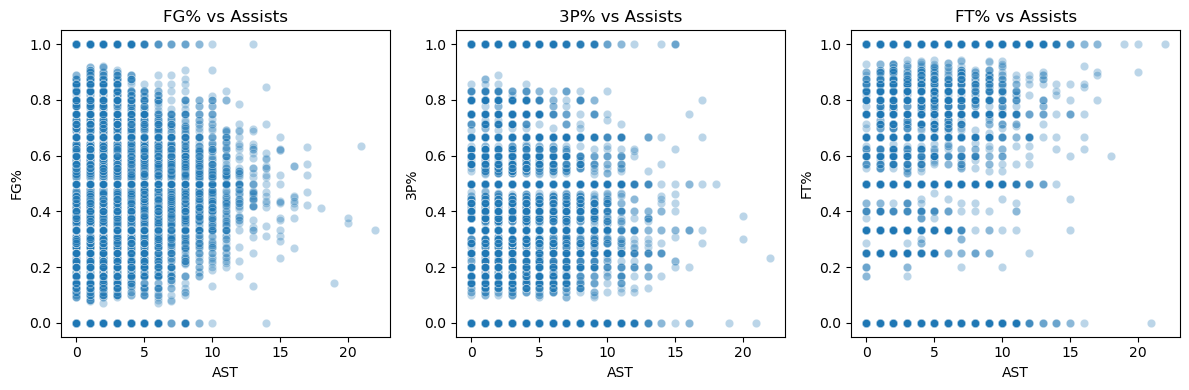

In [21]:
fig, axes = plt.subplots(1, 3, figsize=(12,4))

sns.scatterplot(data=df_q5, x="AST", y="FG%", ax=axes[0], alpha=0.3)
axes[0].set_title("FG% vs Assists")

sns.scatterplot(data=df_q5, x="AST", y="3P%", ax=axes[1], alpha=0.3)
axes[1].set_title("3P% vs Assists")

sns.scatterplot(data=df_q5, x="AST", y="FT%", ax=axes[2], alpha=0.3)
axes[2].set_title("FT% vs Assists")

plt.tight_layout()
plt.show()

## Final Interpretation
Overall, shooting percentages (FG%, 3P%, and FT%) show only weak relationships with traditional box score statistics. From the correlation matrix, minutes played (MP) has the strongest positive association with all three shooting percentages, suggesting that players who stay on the court longer tend to shoot more efficiently.

Rebounds (TRB) and assists (AST) show small positive correlations, while turnovers (TOV) are aren't consistently related. The regression results support this pattern because MP and TRB are consistently statistically significant predictors, while AST and TOV have smaller effects depending on the shooting metric. However, the low R² values indicate that most variation in shooting efficiency is not explained by these factors alone, suggesting that shooting percentages are driven more by individual skill and shot selection than by general box score contributions.